In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import precision_recall_curve, display
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

df = pd.read_csv(r"C:\Users\Asus\Downloads\bank-additional-full.csv\bank-additional-full.csv", sep=';')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [22]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [23]:
print(df.shape)
print(df.columns)
print(df.head)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  marrie

In [24]:
 
# transforming target variable to integer 

df['y'] = df['y'].map({'yes': 1, 'no': 0})

# handling pdays variable 
df['was_contacted'] = (df['pdays'] != 999).astype(int)

# Droping columns
df.drop(['duration', 'pdays'], axis=1, inplace=True)

# dummies method for rest of categorical variables 
df_final = pd.get_dummies(df, drop_first=True)

print(df_final.shape)
print(df_final['y'].head())

(41188, 53)
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


In [25]:
x = df_final.drop('y', axis = 1)
y = df_final['y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [26]:
#scaling 

scaler = StandardScaler()

numeric_cols = ['age', 'campaign', 'previous', 'emp.var.rate',
                'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler.fit(x_train[numeric_cols])

scaler.fit(x_train[numeric_cols])

x_train[numeric_cols] = scaler.transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])


In [27]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [28]:

y_pred = model.predict(x_test)
print(y_pred[:20]) # show first 20 predictions

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [29]:

print("--- CONFUSION MATRIX ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- PERFORMANCE REPORT ---")
print(classification_report(y_test, y_pred))


--- CONFUSION MATRIX ---
[[6252 1051]
 [ 366  569]]

--- PERFORMANCE REPORT ---
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7303
           1       0.35      0.61      0.45       935

    accuracy                           0.83      8238
   macro avg       0.65      0.73      0.67      8238
weighted avg       0.88      0.83      0.85      8238



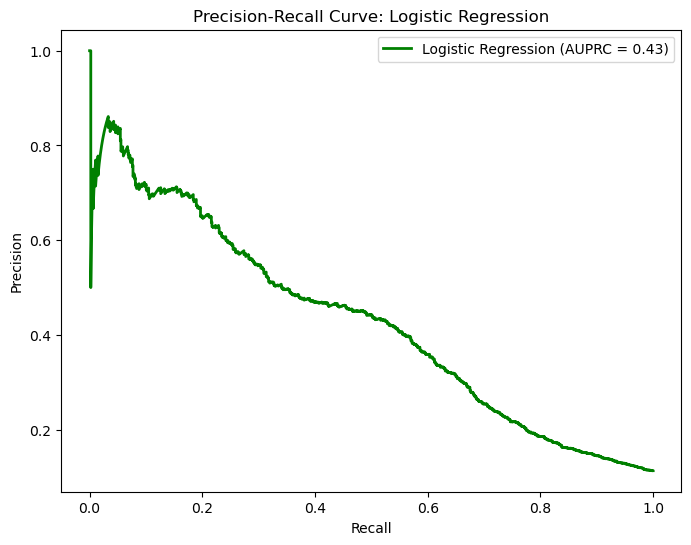

In [33]:
# 1. Generate the probabilities (This is the line you were missing!)
y_probs_logit = model.predict_proba(x_test)[:, 1]

# 2. Calculate the curve values
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_probs_logit)
auprc_lr = average_precision_score(y_test, y_probs_logit)

# 3. Plotting
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUPRC = {auprc_lr:.2f})', color='green', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Logistic Regression')
plt.legend(loc='best')

In [ ]:
#Top features 

importance = model.coef_[0]
feature_names = x_train.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("--- Top 10 Features Predicting a Positive outcome ---")
print(feature_importance.head(10))

print("\n--- Top 10 Features Predicting a Negative outcome ---")
print(feature_importance.tail(10))

--- Top 10 Features Predicting a Positive outcome ---
                 Feature  Importance
41             month_mar    1.542592
8          was_contacted    1.250043
4         cons.price.idx    1.114143
51      poutcome_success    0.668856
37             month_aug    0.648581
6              euribor3m    0.503198
38             month_dec    0.479918
50  poutcome_nonexistent    0.377807
26  education_illiterate    0.361340
7            nr.employed    0.324002

--- Top 10 Features Predicting a Negative outcome ---
              Feature  Importance
1            campaign   -0.128297
46    day_of_week_mon   -0.131764
11      job_housemaid   -0.161532
30    default_unknown   -0.180420
19        job_unknown   -0.230173
43          month_nov   -0.435085
42          month_may   -0.437122
40          month_jun   -0.555984
36  contact_telephone   -0.671015
3        emp.var.rate   -2.294389


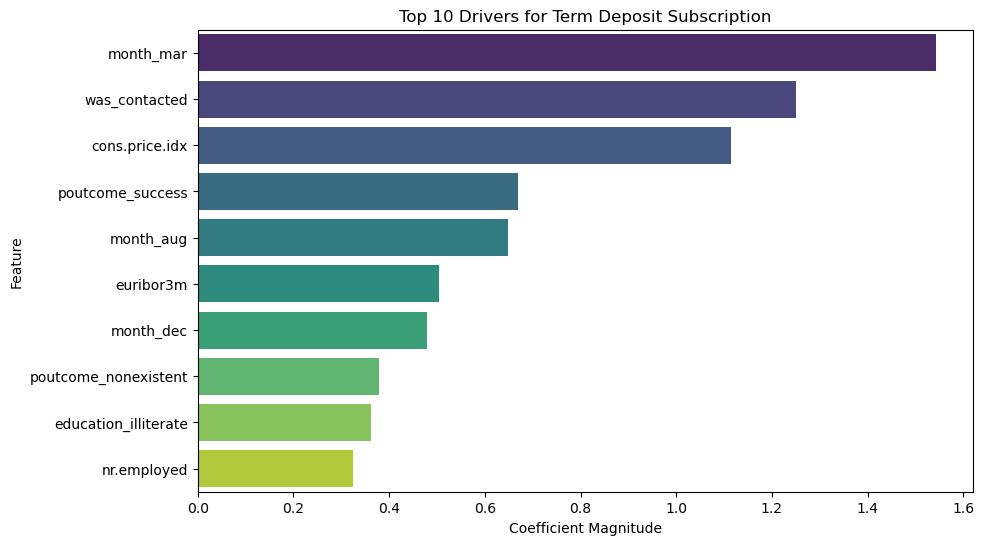

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Using the top 10 from the 'feature_importance' dataframe you already created
top_features = feature_importance.head(10)

sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Drivers for Term Deposit Subscription')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)

y_probs_rf = rf.predict_proba(x_test)[:, 1]

y_pred_tuned = (y_probs_rf >= 0.3).astype(int)

print("--- RANDOM FOREST ---")
print(classification_report(y_test, y_pred_tuned))

--- RANDOM FOREST ---
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7303
           1       0.41      0.44      0.43       935

    accuracy                           0.86      8238
   macro avg       0.67      0.68      0.67      8238
weighted avg       0.87      0.86      0.87      8238



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Defining the 'Search Space'

param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [3, 5, 10],
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2']
}

# Setup the Grid Search
# scoring='f1' to balance Precision and Recall for Class 1
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=3, 
    scoring='f1',
    n_jobs=-1 )

grid_search.fit(x_train, y_train)

# Extracting the best version
best_rf = grid_search.best_estimator_

print(f"Best Settings Found: {grid_search.best_params_}")

y_probs_best = best_rf.predict_proba(x_test)[:, 1]
y_pred_best = (y_probs_best >= 0.3).astype(int)

print("\n--- ADJUSTED RANDOM FOREST RESULTS ---")
print(classification_report(y_test, y_pred_best))

Best Settings Found: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'n_estimators': 200}

--- ADJUSTED RANDOM FOREST RESULTS ---
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      7303
           1       0.26      0.71      0.38       935

    accuracy                           0.74      8238
   macro avg       0.61      0.73      0.61      8238
weighted avg       0.87      0.74      0.78      8238



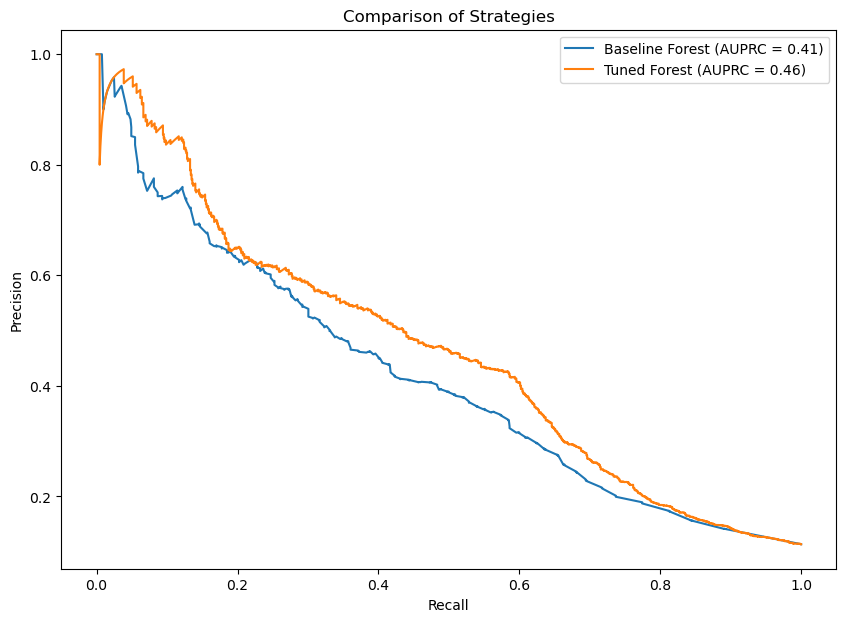

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Calculate the AUPRC scores
auprc_base = average_precision_score(y_test, y_probs_rf)
auprc_tuned = average_precision_score(y_test, y_probs_best)

# 2. Calculate the curve values
precision_base, recall_base, _ = precision_recall_curve(y_test, y_probs_rf)
precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_probs_best)

plt.figure(figsize=(10, 7))

# 3. Plot with f-strings to include the scores in the legend
plt.plot(recall_base, precision_base, 
         label=f'Baseline Forest (AUPRC = {auprc_base:.2f})', )

plt.plot(recall_tuned, precision_tuned, 
         label=f'Tuned Forest (AUPRC = {auprc_tuned:.2f})', )

# 4. Aesthetics
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparison of Strategies')
plt.legend(loc='upper right') 

plt.show()